In [83]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
import pandas as pd

In [85]:
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
import re

In [86]:
from astropy.io import fits

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt

In [88]:
if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
print('workbookDir: ' + workbookDir)

workbookDir: /Users/dagoret/MacOSX/GitHub/LSST/Spectractor/notebooks


In [89]:
import sys
sys.path.append(workbookDir)
sys.path.append(os.path.dirname(workbookDir))

In [90]:
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.logbook import LogBook
from spectractor.extractor.dispersers import *
from spectractor.extractor.spectrum import *

# Configuration

In [91]:
INPUTDIR="../output/20190215"

In [92]:
file_table="T1M_20190216_000723_976_HD116405_Filtre_None_bin1x1.1_red_table.csv"
file_spectrum="T1M_20190216_000723_976_HD116405_Filtre_None_bin1x1.1_red_spectrum.fits"
file_spectrogram="T1M_20190216_000723_976_HD116405_Filtre_None_bin1x1.1_red_spectrogram.fits"

# See files

## Table

In [93]:
fullfilename_table=os.path.join(INPUTDIR,file_table)

In [94]:
df=pd.read_csv(fullfilename_table)

In [95]:
df.head(10)

,lambdas,Dx,Dy,Dy_mean,flux_sum,flux_integral,flux_err,fwhm,Dy_fwhm_sup,Dy_fwhm_inf,Dx_rot,amplitude_moffat,x_mean,gamma,alpha,eta_gauss,stddev,saturation
0,299.622151,477.012840,473.611765,476.832697,-9.988781,0.000000,1.406824,52.515732,492.182386,455.041144,674.47066,-0.357898,-4.554226,9.025056,2.864547,-0.000029,0.1,1333.333333
1,300.065504,477.720080,474.321436,477.539670,3.761290,3.033836,1.410856,9.457109,477.665660,470.977211,675.47066,0.277140,-4.550412,9.019345,2.862998,-0.000044,0.1,1333.333333
2,300.508853,478.427321,475.031101,478.246644,-9.494562,0.000000,1.393128,52.530972,493.607111,456.455090,676.47066,-0.474751,-4.546606,9.013640,2.861451,-0.000058,0.1,1333.333333
3,300.952198,479.134561,475.740760,478.953617,0.930839,0.000000,1.412429,52.538567,494.319456,457.162063,677.47066,-0.044580,-4.542808,9.007943,2.859906,-0.000073,0.1,1333.333333
4,301.395540,479.841801,476.450413,479.660590,-1.631884,0.000000,1.400706,52.546146,495.031789,457.869037,678.47066,-0.268722,-4.539019,9.002254,2.858364,-0.000087,0.1,1333.333333
5,301.838877,480.549042,477.160061,480.367563,1.425539,1.357207,1.401855,9.450198,480.501841,473.818280,679.47066,0.124115,-4.535237,8.996572,2.856824,-0.000101,0.1,1333.333333
6,302.282210,481.256282,477.869702,481.074536,-0.729736,0.000000,1.400475,52.561255,496.456421,459.282983,680.47066,-0.038135,-4.531464,8.990897,2.855286,-0.000116,0.1,1333.333333
7,302.725540,481.963522,478.579338,481.781510,-0.858459,0.000000,1.393955,52.568785,497.168720,459.989956,681.47066,-0.061611,-4.527699,8.985230,2.853751,-0.000130,0.1,1333.333333
8,303.168865,482.670763,479.288968,482.488483,3.817113,1.626514,1.400527,9.451045,482.631049,475.946888,682.47066,0.148865,-4.523943,8.979571,2.852218,-0.000145,0.1,1333.333333
9,303.612186,483.378003,479.998593,483.195456,-4.268321,0.000000,1.391170,52.583795,498.593283,461.403903,683.47066,-0.212412,-4.520194,8.973919,2.850688,-0.000159,0.1,1333.333333


# Spectrum

In [96]:
fullfilename_spectrum=os.path.join(INPUTDIR,file_spectrum)

In [97]:
hdu = fits.open(fullfilename_spectrum)

In [98]:
hdu[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -64 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 1827                                                  
NAXIS2  =                    3                                                  
EXTEND  =                    T / FITS dataset may contain extensions            
BZERO   =                    0 / No baseline shift                              
BSCALE  =                    1 / default scaling factor                         
BIN1    =                    1                                                  
BIN2    =                    1                                                  
DATE-OBS= '2019-02-16T00:07:23.976' / [Date ISO8601] Begining date of the observ
DATE-END= '2019-02-16T00:07:53.979' / [Date ISO8601] End date of the observation
EXPOSURE=                  3

In [99]:
data=hdu[0].data

In [100]:
data.shape

(3, 1827)

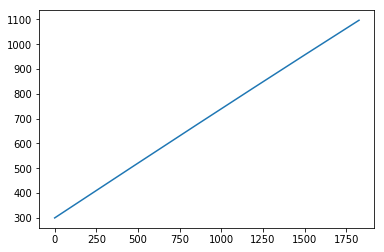

In [101]:
plt.plot(data[0,:])

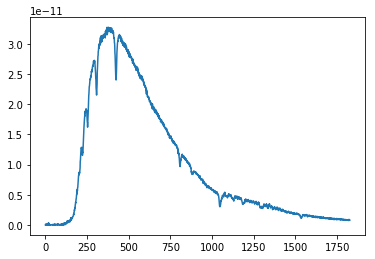

In [102]:
plt.plot(data[1,:])

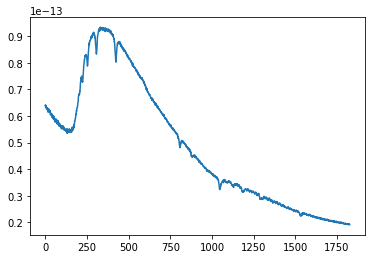

In [103]:
plt.plot(data[2,:])

## Spectrogram

In [104]:
fullfilename_spectrogram=os.path.join(INPUTDIR,file_spectrogram)

In [105]:
hdu = fits.open(fullfilename_spectrogram)

In [106]:
hdu[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -64 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 1291                                                  
NAXIS2  =                 1313                                                  
EXTEND  =                    T / FITS dataset may contain extensions            
BZERO   =                    0 / No baseline shift                              
BSCALE  =                    1 / default scaling factor                         
BIN1    =                    1                                                  
BIN2    =                    1                                                  
DATE-OBS= '2019-02-16T00:07:23.976' / [Date ISO8601] Begining date of the observ
DATE-END= '2019-02-16T00:07:53.979' / [Date ISO8601] End date of the observation
EXPOSURE=                  3

In [107]:
data=hdu[0].data

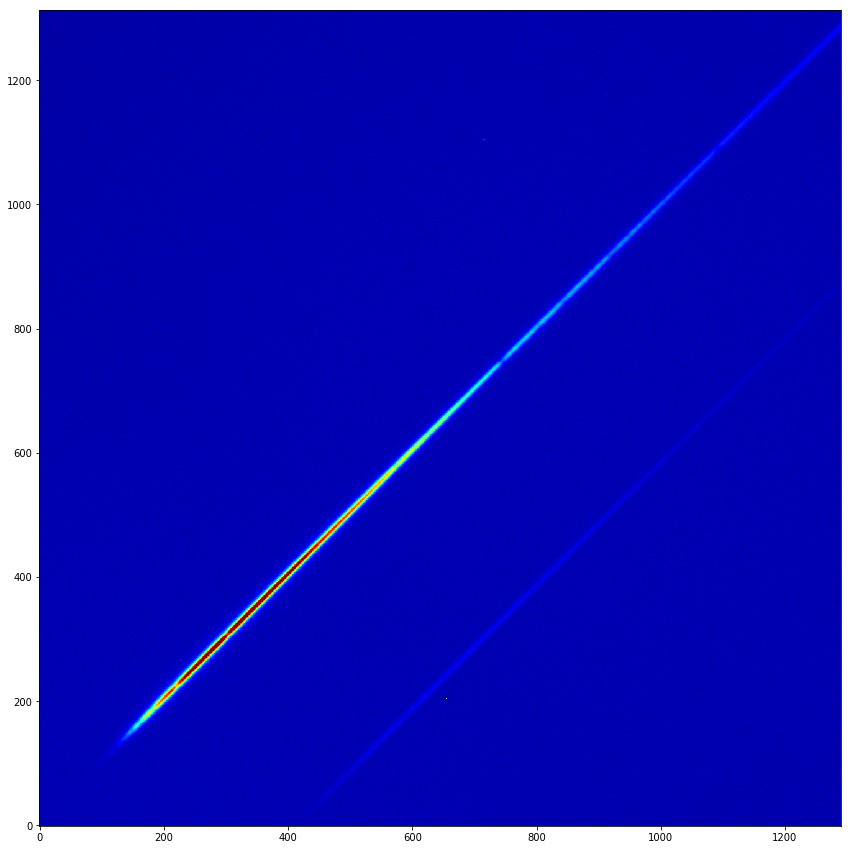

In [114]:
plt.figure(figsize=(15,15))
plt.imshow(data,origin="lower",cmap="jet",vmin=0,vmax=100)
#plt.grid()
plt.show()